# 데이터 불러오기

In [1]:
import pickle

In [2]:
folder_path = 'dataset_224_224/'
x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []

In [3]:
with open(folder_path+'x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open(folder_path+'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open(folder_path+'x_val.pickle', 'rb') as f:
    x_val = pickle.load(f)

with open(folder_path+'y_val.pickle', 'rb') as f:
    y_val = pickle.load(f)

with open(folder_path+'x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)

with open(folder_path+'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [4]:
with open(folder_path+'x_train_zero.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open(folder_path+'y_train_zero.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open(folder_path+'x_val_zero.pickle', 'rb') as f:
    x_val = pickle.load(f)

with open(folder_path+'y_val_zero.pickle', 'rb') as f:
    y_val = pickle.load(f)

with open(folder_path+'x_test_zero.pickle', 'rb') as f:
    x_test = pickle.load(f)

with open(folder_path+'y_test_zero.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [4]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(17154, 224, 224, 3) (17154,) (5718, 224, 224, 3) (5718,) (5718, 224, 224, 3) (5718,)


In [5]:
train_images = x_train
train_labels = y_train
val_images = x_val
val_labels = y_val
test_images = x_test
test_labels = y_test

# CNN Basic Modeling

In [99]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기
import os
import tensorflow as tf

In [100]:
#모델 구축
model = models.Sequential()
## filtering layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [101]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "checkpoints/cnn_basic/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq=5 # 체크포인트 저장하는 에폭주기 설정 가능
)

print(checkpoint_dir)

checkpoints/cnn_basic


In [10]:
import sys
import tensorflow.keras
import pandas as pd
# import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
# print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print(gpu)
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-12.3.1-arm64-arm-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.9.12 (main, Apr  5 2022, 01:52:34) 
[Clang 12.0.0 ]
Pandas 1.5.2
SciPy 1.9.3
True
GPU is available


In [4]:
!pip install tensorflow-metal
!pip install tensorflow-macos
!pip install pandas  --upgrade
!pip install matplotlib  --upgrade
!pip install scikit-learn  --upgrade
!pip install scipy  --upgrade
!pip install plotly  --upgrade
!pip uninstall numpy -y
!conda install -c conda-forge numpy -y
!conda install -c apple tensorflow-deps -y

  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Solving environment: done

## Package Plan ##

  environment location: /Users/jeonminjeong/opt/miniconda3

  added / updated specs:
    - numpy


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2022.10.11~ --> conda-forge::ca-certificates-2022.9.24-h4653dfc_0 None
  certifi            pkgs/main/osx-arm64::certifi-2022.9.2~ --> conda-forge/noarch::certifi-2022.9.24-pyhd8ed1ab_0 None
  openssl              pkgs/main::openssl-1.1.1s-h1a28f6b_0 --> conda-forge::openssl-1.1.1s-h03a7124_0 None


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/jeonminjeong/opt/miniconda3

  added / updated specs:
    - tensorflow-deps


The following packages will be UPDATED:

  c

In [6]:
!pip install numpy --upgrade

  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)


In [7]:
import sys
import tensorflow.keras
import pandas as pd
# import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
# print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print(gpu)
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-12.3.1-arm64-arm-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.9.12 (main, Apr  5 2022, 01:52:34) 
[Clang 12.0.0 ]
Pandas 1.5.2
SciPy 1.9.3
True
GPU is available


In [104]:
#모델 학습
# model.fit(train_images, train_labels, epochs=3,validation_split=0.2,verbose=1)
hist = model.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels), verbose=1, batch_size= 125, callbacks=[cp_callback, early])

Epoch 1/30


2022-11-29 11:31:02.480035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 50.6492 - accuracy: 0.4678

2022-11-29 11:36:58.313715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 402s 3s/step - loss: 50.6492 - accuracy: 0.4678 - val_loss: 0.8673 - val_accuracy: 0.6210
Epoch 2/30
138/138 [==============================] - 403s 3s/step - loss: 0.8310 - accuracy: 0.6390 - val_loss: 0.8113 - val_accuracy: 0.6525
Epoch 3/30
 98/138 [====================>.........] - ETA: 1:39 - loss: 0.7714 - accuracy: 0.6732WARNING:tensorflow:Can save best model only with val_loss available, skipping.


138/138 [==============================] - 383s 3s/step - loss: 0.7626 - accuracy: 0.6755 - val_loss: 0.8195 - val_accuracy: 0.6595
Epoch 4/30
 82/138 [================>.............] - ETA: 2:23 - loss: 0.6870 - accuracy: 0.7123

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x45b210d30>
    label = <none> 
    device = <AGXG13GDevice: 0x13158b200>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x140683000>
        label = <none> 
        device = <AGXG13GDevice: 0x13158b200>
            name = Apple M1 
    retainedReferences = 1


138/138 [==============================] - 395s 3s/step - loss: 0.6877 - accuracy: 0.7125 - val_loss: 0.7657 - val_accuracy: 0.6850
Epoch 5/30
 17/138 [==>...........................] - ETA: 5:06 - loss: 0.6427 - accuracy: 0.7365

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x45b5adf20>
    label = <none> 
    device = <AGXG13GDevice: 0x13158b200>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x140683000>
        label = <none> 
        device = <AGXG13GDevice: 0x13158b200>
            name = Apple M1 
    retainedReferences = 1


138/138 [==============================] - 392s 3s/step - loss: 0.6547 - accuracy: 0.7234 - val_loss: 0.8002 - val_accuracy: 0.6922
Epoch 6/30
138/138 [==============================] - 374s 3s/step - loss: 0.5724 - accuracy: 0.7465 - val_loss: 0.7003 - val_accuracy: 0.7139
Epoch 7/30
138/138 [==============================] - 378s 3s/step - loss: 0.5554 - accuracy: 0.7426 - val_loss: 0.7047 - val_accuracy: 0.7107
Epoch 8/30
 83/138 [=================>............] - ETA: 2:18 - loss: 0.5094 - accuracy: 0.7600WARNING:tensorflow:Can save best model only with val_loss available, skipping.


138/138 [==============================] - 379s 3s/step - loss: 0.5127 - accuracy: 0.7590 - val_loss: 0.6577 - val_accuracy: 0.7015
Epoch 9/30
138/138 [==============================] - 361s 3s/step - loss: 0.4488 - accuracy: 0.7812 - val_loss: 0.7309 - val_accuracy: 0.7237
Epoch 10/30
138/138 [==============================] - 366s 3s/step - loss: 0.4121 - accuracy: 0.7951 - val_loss: 0.7048 - val_accuracy: 0.7095
Epoch 11/30
138/138 [==============================] - 365s 3s/step - loss: 0.3866 - accuracy: 0.8045 - val_loss: 0.7123 - val_accuracy: 0.7195


In [106]:
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

[50.649227142333984, 0.831024706363678, 0.7625709176063538, 0.6877292394638062, 0.6546511650085449, 0.5723602175712585, 0.5554120540618896, 0.5127042531967163, 0.44882088899612427, 0.4120733141899109, 0.3866075277328491]
[0.46776261925697327, 0.639034628868103, 0.6754692792892456, 0.7124868631362915, 0.723388135433197, 0.7465314269065857, 0.7426256537437439, 0.759006679058075, 0.7812172174453735, 0.7951498031616211, 0.8045353889465332]
[0.8673496246337891, 0.8112910389900208, 0.8195466995239258, 0.7656719088554382, 0.8002151250839233, 0.700291633605957, 0.7046827077865601, 0.6577333211898804, 0.7308896780014038, 0.7048047780990601, 0.7123353481292725]
[0.6210213303565979, 0.6525008678436279, 0.6594963669776917, 0.6850297451019287, 0.6922000646591187, 0.713886022567749, 0.7107380628585815, 0.7014690637588501, 0.7236796021461487, 0.7095138430595398, 0.7194823622703552]


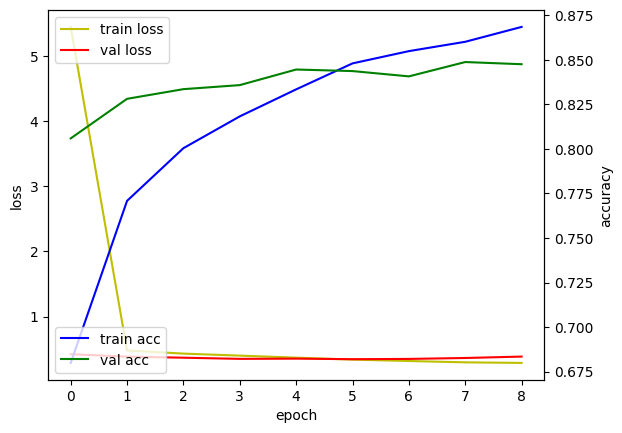

In [107]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [108]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)

179/179 - 71s - loss: 0.6986 - accuracy: 0.7274 - 71s/epoch - 399ms/step
loss:  0.6986321806907654 , acc:  0.7273522615432739


# ResNet 분류기만 학습

In [7]:
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt
import os

In [10]:
base_model = ResNet50(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')
base_model.output_shape
base_model.trainable = False

Metal device set to: Apple M1


2022-12-01 15:12:49.441724: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-01 15:12:49.442111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
y_train = tf.keras.utils.to_categorical(train_labels, 3)
y_val = tf.keras.utils.to_categorical(val_labels, 3)
y_test = tf.keras.utils.to_categorical(test_labels, 3)
y_train.shape, y_val.shape, y_test.shape

((17154, 3), (5718, 3), (5718, 3))

In [11]:
# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [12]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq=5 # 체크포인트 저장하는 에폭주기 설정 가능
)

In [114]:
# categorical_crossentropy
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 fitting
hist_classifi = model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125, callbacks=[cp_callback, early])

Epoch 1/30


2022-11-29 13:04:34.992717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 2.7654 - accuracy: 0.7024

2022-11-29 13:08:31.126258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 313s 2s/step - loss: 2.7654 - accuracy: 0.7024 - val_loss: 0.4254 - val_accuracy: 0.7929
Epoch 2/30
138/138 [==============================] - 524s 4s/step - loss: 0.4766 - accuracy: 0.7538 - val_loss: 0.4361 - val_accuracy: 0.8157
Epoch 3/30
 98/138 [====================>.........] - ETA: 1:11 - loss: 0.4342 - accuracy: 0.7768WARNING:tensorflow:Can save best model only with val_loss available, skipping.


138/138 [==============================] - 319s 2s/step - loss: 0.4347 - accuracy: 0.7761 - val_loss: 0.3690 - val_accuracy: 0.8248
Epoch 4/30
138/138 [==============================] - 342s 2s/step - loss: 0.4068 - accuracy: 0.8008 - val_loss: 0.3642 - val_accuracy: 0.8295
Epoch 5/30
 67/138 [=============>................] - ETA: 1:56 - loss: 0.3545 - accuracy: 0.8233WARNING:tensorflow:Can save best model only with val_loss available, skipping.


138/138 [==============================] - 303s 2s/step - loss: 0.3673 - accuracy: 0.8179 - val_loss: 0.3657 - val_accuracy: 0.8321
Epoch 6/30
138/138 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8328

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Discarded (victim of GPU error/recovery) (00000005:kIOGPUCommandBufferCallbackErrorInnocentVictim)
	<AGXG13GFamilyCommandBuffer: 0x45e8756b0>
    label = <none> 
    device = <AGXG13GDevice: 0x13158b200>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x140683000>
        label = <none> 
        device = <AGXG13GDevice: 0x13158b200>
            name = Apple M1 
    retainedReferences = 1


138/138 [==============================] - 403s 3s/step - loss: 0.3479 - accuracy: 0.8328 - val_loss: 0.3494 - val_accuracy: 0.8129
Epoch 7/30
138/138 [==============================] - 695s 5s/step - loss: 0.3301 - accuracy: 0.8439 - val_loss: 0.3409 - val_accuracy: 0.8437
Epoch 8/30
 98/138 [====================>.........] - ETA: 2:28 - loss: 0.2924 - accuracy: 0.8608WARNING:tensorflow:Can save best model only with val_loss available, skipping.


138/138 [==============================] - 686s 5s/step - loss: 0.2927 - accuracy: 0.8619 - val_loss: 0.3464 - val_accuracy: 0.8501
Epoch 9/30
138/138 [==============================] - 681s 5s/step - loss: 0.2904 - accuracy: 0.8689 - val_loss: 0.3309 - val_accuracy: 0.8526
Epoch 10/30
138/138 [==============================] - 699s 5s/step - loss: 0.2702 - accuracy: 0.8768 - val_loss: 0.4246 - val_accuracy: 0.8384
Epoch 11/30
138/138 [==============================] - ETA: 0s - loss: 0.2666 - accuracy: 0.8794

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Discarded (victim of GPU error/recovery) (00000005:kIOGPUCommandBufferCallbackErrorInnocentVictim)
	<AGXG13GFamilyCommandBuffer: 0x40dd0b4c0>
    label = <none> 
    device = <AGXG13GDevice: 0x13158b200>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x140683000>
        label = <none> 
        device = <AGXG13GDevice: 0x13158b200>
            name = Apple M1 
    retainedReferences = 1


138/138 [==============================] - 702s 5s/step - loss: 0.2666 - accuracy: 0.8794 - val_loss: 0.3744 - val_accuracy: 0.8412
Epoch 12/30
138/138 [==============================] - 712s 5s/step - loss: 0.2379 - accuracy: 0.8903 - val_loss: 0.3520 - val_accuracy: 0.8485


In [116]:
print(hist_classifi.history['loss'])
print(hist_classifi.history['accuracy'])
print(hist_classifi.history['val_loss'])
print(hist_classifi.history['val_accuracy'])

[2.765408754348755, 0.4766216576099396, 0.43473687767982483, 0.40681004524230957, 0.36726346611976624, 0.3479359447956085, 0.3300985097885132, 0.29270341992378235, 0.29037293791770935, 0.2702273428440094, 0.2665938138961792, 0.23785513639450073]
[0.7024017572402954, 0.753760039806366, 0.77608722448349, 0.8008044958114624, 0.8178850412368774, 0.8328086733818054, 0.8439431190490723, 0.8618981242179871, 0.868893563747406, 0.876821756362915, 0.8794450163841248, 0.8902879953384399]
[0.4254401624202728, 0.4360872209072113, 0.36896374821662903, 0.36420172452926636, 0.36565661430358887, 0.349443644285202, 0.3409099280834198, 0.34644052386283875, 0.33090558648109436, 0.4245726764202118, 0.37438979744911194, 0.3520362377166748]
[0.7929345965385437, 0.8156698346138, 0.8247639536857605, 0.8294858336448669, 0.8321091532707214, 0.8128716349601746, 0.8436516523361206, 0.8501224517822266, 0.8525708317756653, 0.8384050726890564, 0.8412032127380371, 0.8485484719276428]


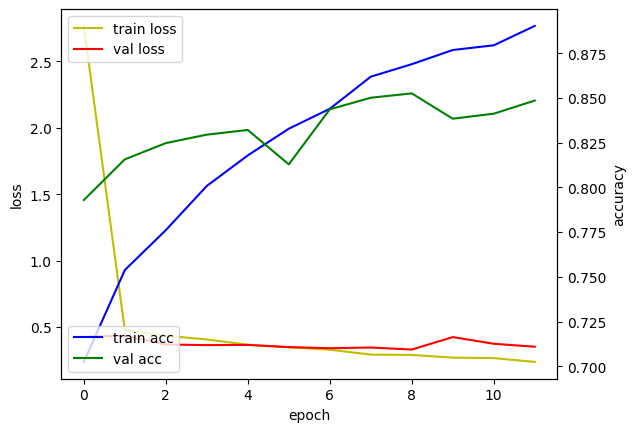

In [117]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [44]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  

179/179 - 64s - loss: 0.3405 - accuracy: 0.8466 - 64s/epoch - 359ms/step
loss:  0.34049415588378906 , acc:  0.8466247320175171


In [45]:
model.save('models/resnet50_1.h5')

# ResNet 하위층 일부 재학습

In [46]:
base_model = ResNet50(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

In [47]:
base_model.trainable = False
base_model.trainable = True

for layer in base_model.layers[:-20]: 
  layer.trainable = False				

for layer in base_model.layers[-100:]:	
  print(layer.name, layer.trainable)

conv3_block4_2_bn False
conv3_block4_2_relu False
conv3_block4_3_conv False
conv3_block4_3_bn False
conv3_block4_add False
conv3_block4_out False
conv4_block1_1_conv False
conv4_block1_1_bn False
conv4_block1_1_relu False
conv4_block1_2_conv False
conv4_block1_2_bn False
conv4_block1_2_relu False
conv4_block1_0_conv False
conv4_block1_3_conv False
conv4_block1_0_bn False
conv4_block1_3_bn False
conv4_block1_add False
conv4_block1_out False
conv4_block2_1_conv False
conv4_block2_1_bn False
conv4_block2_1_relu False
conv4_block2_2_conv False
conv4_block2_2_bn False
conv4_block2_2_relu False
conv4_block2_3_conv False
conv4_block2_3_bn False
conv4_block2_add False
conv4_block2_out False
conv4_block3_1_conv False
conv4_block3_1_bn False
conv4_block3_1_relu False
conv4_block3_2_conv False
conv4_block3_2_bn False
conv4_block3_2_relu False
conv4_block3_3_conv False
conv4_block3_3_bn False
conv4_block3_add False
conv4_block3_out False
conv4_block4_1_conv False
conv4_block4_1_bn False
conv4_bloc

In [48]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [49]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "checkpoints/resnet50_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq=5 # 체크포인트 저장하는 에폭주기 설정 가능
)

In [50]:
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

hist_classifi_2 = model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125, callbacks=[cp_callback, early])

Epoch 1/30


2022-11-28 23:39:18.218458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 0.6028 - accuracy: 0.7721

2022-11-28 23:43:35.424033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 330s 2s/step - loss: 0.6028 - accuracy: 0.7721 - val_loss: 0.3427 - val_accuracy: 0.8323
Epoch 2/30
138/138 [==============================] - 317s 2s/step - loss: 0.2909 - accuracy: 0.8691 - val_loss: 0.3217 - val_accuracy: 0.8468
Epoch 3/30
 98/138 [====================>.........] - ETA: 1:12 - loss: 0.1950 - accuracy: 0.9210WARNING:tensorflow:Can save best model only with val_loss available, skipping.


138/138 [==============================] - 314s 2s/step - loss: 0.2000 - accuracy: 0.9187 - val_loss: 0.3263 - val_accuracy: 0.8526
Epoch 4/30
138/138 [==============================] - 315s 2s/step - loss: 0.1385 - accuracy: 0.9497 - val_loss: 0.3270 - val_accuracy: 0.8524
Epoch 5/30
138/138 [==============================] - 305s 2s/step - loss: 0.0932 - accuracy: 0.9682 - val_loss: 0.3489 - val_accuracy: 0.8667


In [51]:
print(hist_classifi_2.history['loss'])
print(hist_classifi_2.history['accuracy'])
print(hist_classifi_2.history['val_loss'])
print(hist_classifi_2.history['val_accuracy'])

[0.6028326749801636, 0.290896475315094, 0.20000377297401428, 0.138525128364563, 0.09315317124128342]
[0.7720648050308228, 0.869068443775177, 0.9186778664588928, 0.9497493505477905, 0.968170702457428]
[0.3427234888076782, 0.3216700553894043, 0.3262627124786377, 0.32697850465774536, 0.3489185571670532]
[0.8322840332984924, 0.8467996120452881, 0.8525708317756653, 0.8523959517478943, 0.866736650466919]


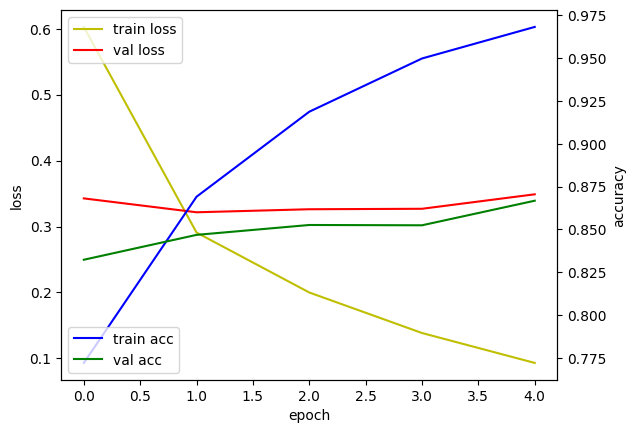

In [68]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_2.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_2.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [53]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc) 

179/179 - 67s - loss: 0.3347 - accuracy: 0.8688 - 67s/epoch - 375ms/step
loss:  0.33469370007514954 , acc:  0.8688352704048157


In [54]:
model.save('models/resnet50_2.h5')

# ResNet 50 전부 재학습

In [29]:
base_model = ResNet50(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

In [30]:
from tensorflow import keras
a= [m for m in dir(keras.activations) if not m.startswith("_")]
print(a)
print()
b = [m for m in dir(keras.layers) if "relu" in m.lower()]
print(b)

['deserialize', 'elu', 'exponential', 'gelu', 'get', 'hard_sigmoid', 'linear', 'relu', 'selu', 'serialize', 'sigmoid', 'softmax', 'softplus', 'softsign', 'swish', 'tanh']

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']


In [31]:
y_train = tf.keras.utils.to_categorical(train_labels, 3)
y_val = tf.keras.utils.to_categorical(val_labels, 3)
y_test = tf.keras.utils.to_categorical(test_labels, 3)
y_train.shape, y_val.shape, y_test.shape

((17154, 3), (5718, 3), (5718, 3))

In [32]:
base_model.trainable = True

In [33]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='LeakyReLU')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [34]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01)

checkpoint_path = "./checkpoints/resnet50_3/cp-2-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

model_name = '_ResNet50'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_resnet50_tune = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0)

In [35]:
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.00001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

model.trainable = True

hist_classifi_3 = model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val)
                            , batch_size=125, callbacks=[cp_callback, early, board_resnet50_tune, reduce_lr])

Epoch 1/30


2022-11-30 19:03:07.882797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 28/138 [=====>........................] - ETA: 22:18 - loss: 1.4048 - accuracy: 0.6369

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x2f54ece80>
    label = <none> 
    device = <AGXG13GDevice: 0x132445400>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x17fc18200>
        label = <none> 
        device = <AGXG13GDevice: 0x132445400>
            name = Apple M1 
    retainedReferences = 1


127/138 [==========================>...] - ETA: 2:06 - loss: 0.7535 - accuracy: 0.7302

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x6c6ef4800>
    label = <none> 
    device = <AGXG13GDevice: 0x132445400>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x17fc18200>
        label = <none> 
        device = <AGXG13GDevice: 0x132445400>
            name = Apple M1 
    retainedReferences = 1


138/138 [==============================] - ETA: 0s - loss: 0.7297 - accuracy: 0.7357 

2022-11-30 19:29:47.099999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0001.ckpt/assets


INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0001.ckpt/assets


138/138 [==============================] - 1751s 13s/step - loss: 0.7297 - accuracy: 0.7357 - val_loss: 0.3924 - val_accuracy: 0.8218 - lr: 1.0000e-05
Epoch 2/30
138/138 [==============================] - ETA: 0s - loss: 0.3508 - accuracy: 0.8424

INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0002.ckpt/assets


INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0002.ckpt/assets


138/138 [==============================] - 900s 7s/step - loss: 0.3508 - accuracy: 0.8424 - val_loss: 0.3541 - val_accuracy: 0.8354 - lr: 1.0000e-05
Epoch 3/30
138/138 [==============================] - ETA: 0s - loss: 0.2546 - accuracy: 0.8896

INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0003.ckpt/assets


INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0003.ckpt/assets


138/138 [==============================] - 846s 6s/step - loss: 0.2546 - accuracy: 0.8896 - val_loss: 0.3368 - val_accuracy: 0.8475 - lr: 1.0000e-05
Epoch 4/30
138/138 [==============================] - ETA: 0s - loss: 0.1847 - accuracy: 0.9257

INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0004.ckpt/assets


INFO:tensorflow:Assets written to: ./checkpoints/resnet50_3/cp-2-0004.ckpt/assets


138/138 [==============================] - 845s 6s/step - loss: 0.1847 - accuracy: 0.9257 - val_loss: 0.3361 - val_accuracy: 0.8592 - lr: 1.0000e-05
Epoch 5/30
138/138 [==============================] - 778s 6s/step - loss: 0.1311 - accuracy: 0.9516 - val_loss: 0.3429 - val_accuracy: 0.8608 - lr: 1.0000e-05
Epoch 6/30
138/138 [==============================] - 762s 6s/step - loss: 0.0930 - accuracy: 0.9681 - val_loss: 0.3726 - val_accuracy: 0.8687 - lr: 1.0000e-05
Epoch 7/30
138/138 [==============================] - 1504s 11s/step - loss: 0.0674 - accuracy: 0.9777 - val_loss: 0.4058 - val_accuracy: 0.8618 - lr: 1.0000e-05
Epoch 8/30
138/138 [==============================] - 762s 6s/step - loss: 0.0448 - accuracy: 0.9879 - val_loss: 0.3725 - val_accuracy: 0.8709 - lr: 1.0000e-06


In [36]:
print(hist_classifi_3.history['loss'])
print(hist_classifi_3.history['accuracy'])
print(hist_classifi_3.history['val_loss'])
print(hist_classifi_3.history['val_accuracy'])

[0.7296504974365234, 0.3508484959602356, 0.25460588932037354, 0.18473610281944275, 0.13106891512870789, 0.09300900250673294, 0.06736957281827927, 0.04477789252996445]
[0.7356884479522705, 0.8424274325370789, 0.8896467089653015, 0.9257315993309021, 0.9516147971153259, 0.9681124091148376, 0.9776728749275208, 0.9879328608512878]
[0.3923550546169281, 0.3540952801704407, 0.3368423283100128, 0.33611878752708435, 0.3429426848888397, 0.37263986468315125, 0.40584874153137207, 0.37252020835876465]
[0.821790874004364, 0.8354319930076599, 0.8474991321563721, 0.8592165112495422, 0.860790491104126, 0.8686603903770447, 0.8618398308753967, 0.8709338903427124]


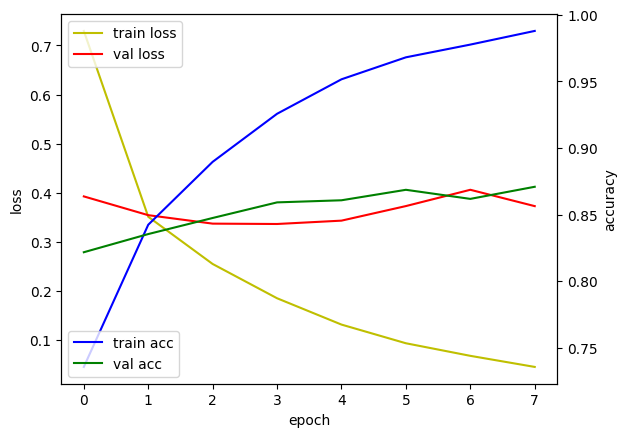

In [37]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [38]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc) 

179/179 - 70s - loss: 0.3647 - accuracy: 0.8718 - 70s/epoch - 389ms/step
loss:  0.3647293150424957 , acc:  0.8718083500862122


In [39]:
model.save('models/resnet50_3_tuned1.h5')

# ResNet50 find-tune

In [21]:
import datetime

model_name = '_ResNet50_find_tune'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_resnet50_fine = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산



In [22]:
base_model = tf.keras.models.load_model('models/resnet50_1.h5')

In [23]:
## fine-tune
base_model.trainable = True

base_model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_fine/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 5:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

In [25]:
hist_classifi_4 = base_model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val)
                            , batch_size=125, callbacks=[cp_callback, early, board_resnet50_fine, lr_schedule])

Epoch 1/30


2022-12-01 15:19:02.826239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 21/138 [===>..........................] - ETA: 10:32 - loss: 0.6734 - accuracy: 0.7360

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x5616d8bd0>
    label = <none> 
    device = <AGXG13GDevice: 0x105c75600>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x38a814e00>
        label = <none> 
        device = <AGXG13GDevice: 0x105c75600>
            name = Apple M1 
    retainedReferences = 1


 29/138 [=====>........................] - ETA: 13:04 - loss: 0.6198 - accuracy: 0.7528

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x563279750>
    label = <none> 
    device = <AGXG13GDevice: 0x105c75600>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x38a814e00>
        label = <none> 
        device = <AGXG13GDevice: 0x105c75600>
            name = Apple M1 
    retainedReferences = 1


 31/138 [=====>........................] - ETA: 13:23 - loss: 0.6070 - accuracy: 0.7566

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x5616dc7c0>
    label = <none> 
    device = <AGXG13GDevice: 0x105c75600>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x38a814e00>
        label = <none> 
        device = <AGXG13GDevice: 0x105c75600>
            name = Apple M1 
    retainedReferences = 1


 56/138 [===========>..................] - ETA: 12:48 - loss: 0.5193 - accuracy: 0.7839

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x561552c20>
    label = <none> 
    device = <AGXG13GDevice: 0x105c75600>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x38a814e00>
        label = <none> 
        device = <AGXG13GDevice: 0x105c75600>
            name = Apple M1 
    retainedReferences = 1


 57/138 [===========>..................] - ETA: 12:42 - loss: 0.5172 - accuracy: 0.7846

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13GFamilyCommandBuffer: 0x556a986a0>
    label = <none> 
    device = <AGXG13GDevice: 0x105c75600>
        name = Apple M1 
    commandQueue = <AGXG13GFamilyCommandQueue: 0x38a814e00>
        label = <none> 
        device = <AGXG13GDevice: 0x105c75600>
            name = Apple M1 
    retainedReferences = 1


138/138 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8210

2022-12-01 15:40:22.659542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_fine/cp-0001.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_fine/cp-0001.ckpt/assets


138/138 [==============================] - 1381s 10s/step - loss: 0.4160 - accuracy: 0.8210 - val_loss: 0.3506 - val_accuracy: 0.8389 - lr: 1.0000e-04
Epoch 2/30
138/138 [==============================] - ETA: 0s - loss: 0.2919 - accuracy: 0.8770

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_fine/cp-0002.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_fine/cp-0002.ckpt/assets


138/138 [==============================] - 1049s 8s/step - loss: 0.2919 - accuracy: 0.8770 - val_loss: 0.3366 - val_accuracy: 0.8318 - lr: 1.0000e-04
Epoch 3/30
138/138 [==============================] - ETA: 0s - loss: 0.2511 - accuracy: 0.8979

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_fine/cp-0003.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/resnet50_fine/cp-0003.ckpt/assets


138/138 [==============================] - 855s 6s/step - loss: 0.2511 - accuracy: 0.8979 - val_loss: 0.3242 - val_accuracy: 0.8554 - lr: 1.0000e-04
Epoch 4/30
138/138 [==============================] - 816s 6s/step - loss: 0.2016 - accuracy: 0.9201 - val_loss: 0.3713 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 5/30
138/138 [==============================] - 767s 6s/step - loss: 0.1787 - accuracy: 0.9297 - val_loss: 0.3847 - val_accuracy: 0.8543 - lr: 1.0000e-04
Epoch 6/30
138/138 [==============================] - 840s 6s/step - loss: 0.1055 - accuracy: 0.9632 - val_loss: 0.4073 - val_accuracy: 0.8664 - lr: 1.0000e-05


In [26]:
print(hist_classifi_4.history['loss'])
print(hist_classifi_4.history['accuracy'])
print(hist_classifi_4.history['val_loss'])
print(hist_classifi_4.history['val_accuracy'])

[0.41599321365356445, 0.2918623685836792, 0.25112032890319824, 0.20160967111587524, 0.17873628437519073, 0.1054941937327385]
[0.8209747076034546, 0.876996636390686, 0.8979246616363525, 0.9200769662857056, 0.929695725440979, 0.9632155895233154]
[0.35060814023017883, 0.33659639954566956, 0.32416293025016785, 0.37132757902145386, 0.3847469389438629, 0.4072977900505066]
[0.8389297127723694, 0.8317593932151794, 0.8553690314292908, 0.8438265323638916, 0.85431969165802, 0.866386890411377]


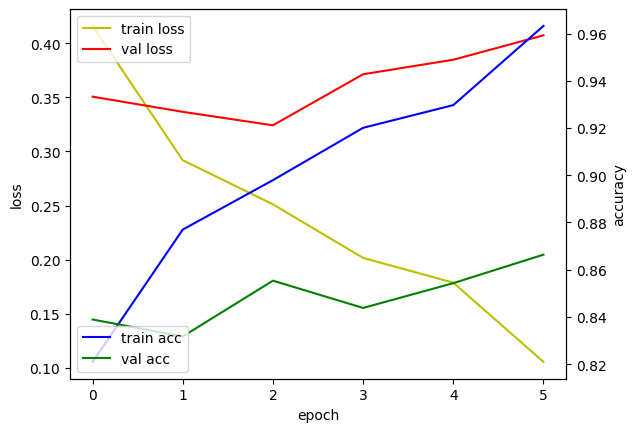

In [27]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_4.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_4.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_4.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_4.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [28]:
#모델 검증
test_loss, test_acc = base_model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc) 

179/179 - 72s - loss: 0.3781 - accuracy: 0.8680 - 72s/epoch - 400ms/step
loss:  0.3781234622001648 , acc:  0.8679608702659607


In [29]:
base_model.save('models/resnet50_4.h5')

# TensorBoard

In [7]:
%load_ext tensorboard

In [8]:
import datetime

In [15]:
model_name = '_InceptionResNetV2'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_inception = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산


# InceptionResNetV2

## 분류기만

In [9]:
import os

In [29]:
train_images = x_train
train_labels = y_train
val_images = x_val
val_labels = y_val
test_images = x_test
test_labels = y_test

In [30]:
import tensorflow as tf

base_model = tf.keras.applications.InceptionResNetV2(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

base_model.trainable = False

y_train = tf.keras.utils.to_categorical(train_labels, 3)
y_val = tf.keras.utils.to_categorical(val_labels, 3)
y_test = tf.keras.utils.to_categorical(test_labels, 3)
y_train.shape, y_test.shape

# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_inception = tf.keras.Model(inputs, outputs)

# categorical_crossentropy
model_inception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

In [22]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

In [23]:
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

In [31]:
hist_classifi_5 = model_inception.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_inception, lr_schedule])

Epoch 1/30


2022-11-29 22:36:25.392546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 345.3413 - accuracy: 0.3423

2022-11-29 22:41:04.171690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0001.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0001.ckpt/assets


138/138 [==============================] - 449s 3s/step - loss: 345.3413 - accuracy: 0.3423 - val_loss: 1.1001 - val_accuracy: 0.3498 - lr: 0.0010
Epoch 2/30
138/138 [==============================] - ETA: 0s - loss: 3.9782 - accuracy: 0.3502

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0002.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0002.ckpt/assets


138/138 [==============================] - 436s 3s/step - loss: 3.9782 - accuracy: 0.3502 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 3/30
138/138 [==============================] - ETA: 0s - loss: 1.0977 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0003.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0003.ckpt/assets


138/138 [==============================] - 444s 3s/step - loss: 1.0977 - accuracy: 0.3501 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 4/30
138/138 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0004.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0004.ckpt/assets


138/138 [==============================] - 431s 3s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0989 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 5/30
138/138 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0005.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-1-0005.ckpt/assets


138/138 [==============================] - 429s 3s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0989 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 6/30
138/138 [==============================] - 357s 3s/step - loss: 5.3414 - accuracy: 0.3499 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 7/30
138/138 [==============================] - 965s 7s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 8/30
138/138 [==============================] - 1984s 14s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 0.0010


In [32]:
print(hist_classifi_5.history['loss'])
print(hist_classifi_5.history['accuracy'])
print(hist_classifi_5.history['val_loss'])
print(hist_classifi_5.history['val_accuracy'])

[345.34130859375, 3.978234052658081, 1.097655177116394, 1.0976241827011108, 1.0976179838180542, 5.34135103225708, 1.0976253747940063, 1.0976176261901855]
[0.34225255250930786, 0.35023900866508484, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3499475419521332, 0.3501224219799042, 0.3501224219799042]
[1.100127100944519, 1.0990254878997803, 1.0989556312561035, 1.0989326238632202, 1.0989255905151367, 1.098954439163208, 1.0989532470703125, 1.098953127861023]
[0.3497726619243622, 0.3499475419521332, 0.3499475419521332, 0.3499475419521332, 0.3499475419521332, 0.3499475419521332, 0.3499475419521332, 0.3499475419521332]


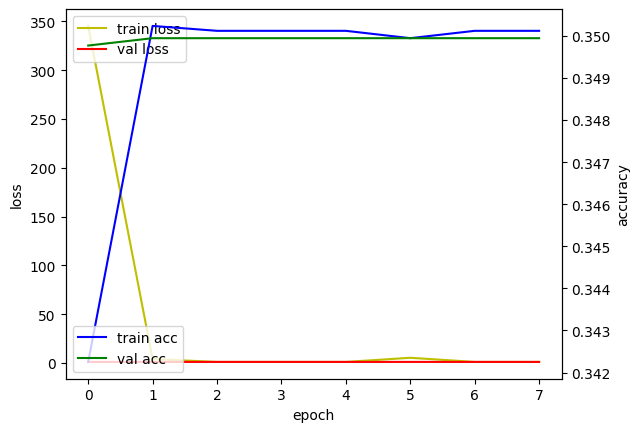

In [33]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_5.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_5.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_5.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_5.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [34]:
#모델 검증
test_loss, test_acc = model_inception.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc) 

179/179 - 690s - loss: 1.0976 - accuracy: 0.3503 - 690s/epoch - 4s/step
loss:  1.0975652933120728 , acc:  0.35029730200767517


In [36]:
model_inception.save('models/inception1.h5')

## 하위층만 학습

In [37]:
base_model = tf.keras.applications.InceptionResNetV2(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

In [38]:
base_model.trainable = False
base_model.trainable = True

for layer in base_model.layers[:-20]: 
  layer.trainable = False				

for layer in base_model.layers[-100:]:	
  print(layer.name, layer.trainable)

block8_4 False
block8_4_ac False
conv2d_789 False
batch_normalization_789 False
activation_789 False
conv2d_790 False
batch_normalization_790 False
activation_790 False
conv2d_788 False
conv2d_791 False
batch_normalization_788 False
batch_normalization_791 False
activation_788 False
activation_791 False
block8_5_mixed False
block8_5_conv False
block8_5 False
block8_5_ac False
conv2d_793 False
batch_normalization_793 False
activation_793 False
conv2d_794 False
batch_normalization_794 False
activation_794 False
conv2d_792 False
conv2d_795 False
batch_normalization_792 False
batch_normalization_795 False
activation_792 False
activation_795 False
block8_6_mixed False
block8_6_conv False
block8_6 False
block8_6_ac False
conv2d_797 False
batch_normalization_797 False
activation_797 False
conv2d_798 False
batch_normalization_798 False
activation_798 False
conv2d_796 False
conv2d_799 False
batch_normalization_796 False
batch_normalization_799 False
activation_796 False
activation_799 False
blo

In [39]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_inception_2 = tf.keras.Model(inputs, outputs)

In [40]:
model_inception_2.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

In [41]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

In [42]:
model_name = '_InceptionResNetV2_2'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_inception2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

In [43]:
hist_classifi_6 = model_inception_2.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_inception2, lr_schedule])

Epoch 1/30


2022-11-30 01:43:32.138414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 34.0495 - accuracy: 0.3540

2022-11-30 01:48:07.777716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0001.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0001.ckpt/assets


138/138 [==============================] - 447s 3s/step - loss: 34.0495 - accuracy: 0.3540 - val_loss: 1.0984 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 2/30
138/138 [==============================] - 345s 3s/step - loss: 1.0986 - accuracy: 0.3504 - val_loss: 1.0984 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 3/30
138/138 [==============================] - ETA: 0s - loss: 1.0984 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0003.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0003.ckpt/assets


138/138 [==============================] - 1323s 10s/step - loss: 1.0984 - accuracy: 0.3501 - val_loss: 1.0983 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 4/30
138/138 [==============================] - ETA: 0s - loss: 1.0984 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0004.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0004.ckpt/assets


138/138 [==============================] - 601s 4s/step - loss: 1.0984 - accuracy: 0.3501 - val_loss: 1.0982 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 5/30
138/138 [==============================] - ETA: 0s - loss: 1.0982 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0005.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0005.ckpt/assets


138/138 [==============================] - 653s 5s/step - loss: 1.0982 - accuracy: 0.3501 - val_loss: 1.0982 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 6/30
138/138 [==============================] - ETA: 0s - loss: 1.0981 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0006.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0006.ckpt/assets


138/138 [==============================] - 659s 5s/step - loss: 1.0981 - accuracy: 0.3501 - val_loss: 1.0981 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 7/30
138/138 [==============================] - ETA: 0s - loss: 1.0980 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0007.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0007.ckpt/assets


138/138 [==============================] - 652s 5s/step - loss: 1.0980 - accuracy: 0.3501 - val_loss: 1.0980 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 8/30
138/138 [==============================] - ETA: 0s - loss: 1.0980 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0008.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0008.ckpt/assets


138/138 [==============================] - 657s 5s/step - loss: 1.0980 - accuracy: 0.3501 - val_loss: 1.0979 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 9/30
138/138 [==============================] - ETA: 0s - loss: 1.0979 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0009.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0009.ckpt/assets


138/138 [==============================] - 2400s 18s/step - loss: 1.0979 - accuracy: 0.3501 - val_loss: 1.0979 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 10/30
138/138 [==============================] - ETA: 0s - loss: 1.0979 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0010.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0010.ckpt/assets


138/138 [==============================] - 512s 4s/step - loss: 1.0979 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 11/30
138/138 [==============================] - ETA: 0s - loss: 1.0978 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0011.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0011.ckpt/assets


138/138 [==============================] - 617s 4s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-05
Epoch 12/30
138/138 [==============================] - ETA: 0s - loss: 1.0978 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0012.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0012.ckpt/assets


138/138 [==============================] - 641s 5s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-06
Epoch 13/30
138/138 [==============================] - ETA: 0s - loss: 1.0978 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0013.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-2-0013.ckpt/assets


138/138 [==============================] - 646s 5s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-07
Epoch 14/30
138/138 [==============================] - 1378s 10s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-08
Epoch 15/30
138/138 [==============================] - 446s 3s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-09
Epoch 16/30
138/138 [==============================] - 346s 3s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-10


In [44]:
print(hist_classifi_6.history['loss'])
print(hist_classifi_6.history['accuracy'])
print(hist_classifi_6.history['val_loss'])
print(hist_classifi_6.history['val_accuracy'])

[34.049468994140625, 1.0986236333847046, 1.098404049873352, 1.0983872413635254, 1.0982106924057007, 1.0981194972991943, 1.0980383157730103, 1.0979712009429932, 1.0979074239730835, 1.0978566408157349, 1.0978244543075562, 1.097821593284607, 1.0978211164474487, 1.0978212356567383, 1.0978209972381592, 1.0978213548660278]
[0.35402822494506836, 0.35041388869285583, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042]
[1.0984195470809937, 1.0984216928482056, 1.0983213186264038, 1.0982481241226196, 1.0981570482254028, 1.0980703830718994, 1.0979984998703003, 1.097933292388916, 1.0978734493255615, 1.097825527191162, 1.0978220701217651, 1.0978214740753174, 1.0978208780288696, 1.0978208780288696, 1.0978208780288696, 1.0978208780288696]
[0.3501224219799042, 0.3501224219799042

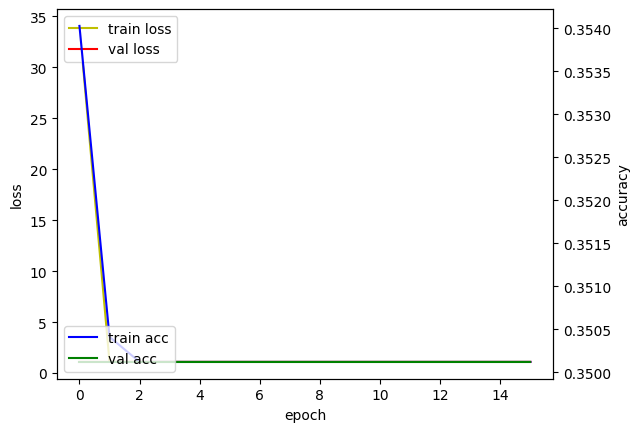

In [45]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_6.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_6.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_6.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_6.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [46]:
#모델 검증
test_loss, test_acc = model_inception_2.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  

179/179 - 89s - loss: 1.0978 - accuracy: 0.3501 - 89s/epoch - 499ms/step
loss:  1.097823143005371 , acc:  0.3501224219799042


In [47]:
model_inception_2.save('models/inception2.h5')

## 전체학습

In [48]:
base_model = tf.keras.applications.InceptionResNetV2(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

In [49]:
base_model.trainable = True

In [50]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_inception_3 = tf.keras.Model(inputs, outputs)

In [51]:
model_inception_3.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

In [52]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

In [53]:
model_name = '_InceptionResNetV2_3'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_inception3 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

In [54]:
hist_classifi_7 = model_inception_3.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_inception3, lr_schedule])

Epoch 1/30


2022-11-30 05:10:44.778015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 6.3161 - accuracy: 0.3471 

2022-11-30 05:46:45.126014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0001.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0001.ckpt/assets


138/138 [==============================] - 2427s 18s/step - loss: 6.3161 - accuracy: 0.3471 - val_loss: 1.0985 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 2/30
138/138 [==============================] - ETA: 0s - loss: 1.0984 - accuracy: 0.3501 

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0002.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0002.ckpt/assets


138/138 [==============================] - 1943s 14s/step - loss: 1.0984 - accuracy: 0.3501 - val_loss: 1.0983 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 3/30
138/138 [==============================] - ETA: 0s - loss: 1.0982 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0003.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0003.ckpt/assets


138/138 [==============================] - 1182s 9s/step - loss: 1.0982 - accuracy: 0.3501 - val_loss: 1.0982 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 4/30
138/138 [==============================] - ETA: 0s - loss: 1.0981 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0004.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0004.ckpt/assets


138/138 [==============================] - 1742s 13s/step - loss: 1.0981 - accuracy: 0.3501 - val_loss: 1.0980 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 5/30
138/138 [==============================] - ETA: 0s - loss: 1.0980 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0005.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0005.ckpt/assets


138/138 [==============================] - 1447s 11s/step - loss: 1.0980 - accuracy: 0.3501 - val_loss: 1.0979 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 6/30
138/138 [==============================] - ETA: 0s - loss: 1.0980 - accuracy: 0.3501 

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0006.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0006.ckpt/assets


138/138 [==============================] - 4647s 34s/step - loss: 1.0980 - accuracy: 0.3501 - val_loss: 1.0979 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 7/30
138/138 [==============================] - ETA: 0s - loss: 1.0979 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0007.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0007.ckpt/assets


138/138 [==============================] - 1241s 9s/step - loss: 1.0979 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 8/30
138/138 [==============================] - ETA: 0s - loss: 1.0978 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0008.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0008.ckpt/assets


138/138 [==============================] - 1214s 9s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0978 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 9/30
138/138 [==============================] - ETA: 0s - loss: 1.0978 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0009.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0009.ckpt/assets


138/138 [==============================] - 1307s 9s/step - loss: 1.0978 - accuracy: 0.3501 - val_loss: 1.0977 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 10/30
138/138 [==============================] - ETA: 0s - loss: 1.0977 - accuracy: 0.3501

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0010.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0010.ckpt/assets


138/138 [==============================] - 1255s 9s/step - loss: 1.0977 - accuracy: 0.3501 - val_loss: 1.0977 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 11/30
138/138 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.3501 

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0011.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0011.ckpt/assets


138/138 [==============================] - 2319s 17s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0977 - val_accuracy: 0.3501 - lr: 1.0000e-05
Epoch 12/30
138/138 [==============================] - ETA: 0s - loss: 1.0977 - accuracy: 0.3501 

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0012.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-3-0012.ckpt/assets


138/138 [==============================] - 2708s 20s/step - loss: 1.0977 - accuracy: 0.3501 - val_loss: 1.0977 - val_accuracy: 0.3501 - lr: 1.0000e-06
Epoch 13/30
138/138 [==============================] - 1531s 11s/step - loss: 1.0977 - accuracy: 0.3501 - val_loss: 1.0977 - val_accuracy: 0.3501 - lr: 1.0000e-07
Epoch 14/30
138/138 [==============================] - 1206s 9s/step - loss: 1.0977 - accuracy: 0.3501 - val_loss: 1.0977 - val_accuracy: 0.3501 - lr: 1.0000e-08
Epoch 15/30
138/138 [==============================] - 2198s 16s/step - loss: 1.0977 - accuracy: 0.3501 - val_loss: 1.0977 - val_accuracy: 0.3501 - lr: 1.0000e-09


In [55]:
print(hist_classifi_7.history['loss'])
print(hist_classifi_7.history['accuracy'])
print(hist_classifi_7.history['val_loss'])
print(hist_classifi_7.history['val_accuracy'])

[6.316059112548828, 1.098403811454773, 1.0982472896575928, 1.0980936288833618, 1.0980336666107178, 1.0979948043823242, 1.0978657007217407, 1.097784161567688, 1.0977665185928345, 1.0977386236190796, 1.0975984334945679, 1.0976954698562622, 1.097748875617981, 1.097705364227295, 1.0976641178131104]
[0.3471493422985077, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042]
[1.0984817743301392, 1.0983226299285889, 1.0981643199920654, 1.098046064376831, 1.097947597503662, 1.0978670120239258, 1.0978118181228638, 1.0977524518966675, 1.0977139472961426, 1.09768545627594, 1.0976817607879639, 1.0976811647415161, 1.0976821184158325, 1.0976821184158325, 1.0976821184158325]
[0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.3501224219799042, 0.350

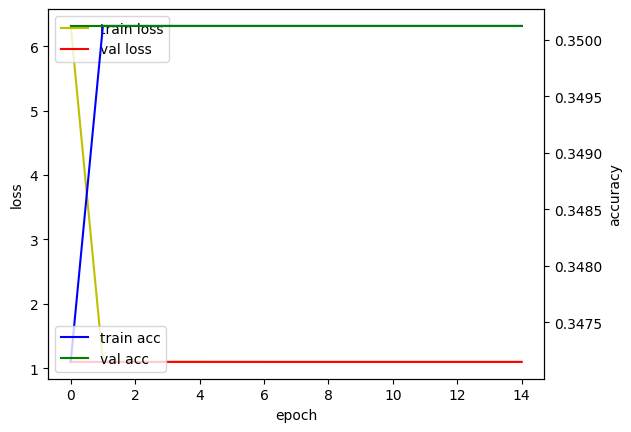

In [56]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_7.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_7.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_7.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_7.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [57]:
#모델 검증
test_loss, test_acc = model_inception_3.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  

179/179 - 101s - loss: 1.0977 - accuracy: 0.3501 - 101s/epoch - 564ms/step
loss:  1.0976827144622803 , acc:  0.3501224219799042


In [58]:
model_inception_3.save('models/inception3.h5')

## fine-tune

In [59]:
## fine-tune
model_inception.trainable = True

model_inception.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [60]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-4-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

In [61]:
model_name = '_InceptionResNetV2_4'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_inception4 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

In [62]:
hist_classifi_8 = model_inception.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_inception4, lr_schedule])

Epoch 1/30


2022-11-30 13:16:20.486692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.3501

2022-11-30 13:36:42.375746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-4-0001.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-4-0001.ckpt/assets


138/138 [==============================] - 1431s 10s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 1.0000e-04
Epoch 2/30
138/138 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.3501 

INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-4-0002.ckpt/assets


INFO:tensorflow:Assets written to: /Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/inception/cp-4-0002.ckpt/assets


138/138 [==============================] - 1740s 13s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 1.0000e-04
Epoch 3/30
138/138 [==============================] - 1329s 10s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 1.0000e-04
Epoch 4/30
138/138 [==============================] - 1398s 10s/step - loss: 1.0976 - accuracy: 0.3501 - val_loss: 1.0990 - val_accuracy: 0.3499 - lr: 1.0000e-04
Epoch 5/30
 30/138 [=====>........................] - ETA: 16:20 - loss: 1.0978 - accuracy: 0.3464

KeyboardInterrupt: 

In [ ]:
print(hist_classifi_8.history['loss'])
print(hist_classifi_8.history['accuracy'])
print(hist_classifi_8.history['val_loss'])
print(hist_classifi_8.history['val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_8.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_8.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_8.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_8.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
#모델 검증
test_loss, test_acc = model_inception.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  

In [ ]:
model_inception.save('models/inception4.h5')

# EfficientNetB7

In [ ]:
import tensorflow as tf

base_model = tf.keras.applications.EfficientNetB7(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

base_model.trainable = False

y_train = tf.keras.utils.to_categorical(train_labels, 3)
y_test = tf.keras.utils.to_categorical(test_labels, 3)
y_train.shape, y_test.shape

# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_inception = tf.keras.Model(inputs, outputs)

# categorical_crossentropy
model_inception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])